<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Введение**:

Предоставлена база данных с клиентами банка и различными данными о них. Целью данного проекта является выявление наиболее подходящей модели машинного обучения, которая бы наилучшим образом предсказала, уйдет клиент из банка в ближайшее время или же останется.

Задачами проекта (а соответственно и его план) являются: 
 - [Подготовка данных](#data_preparation)
 - [Исследование задачи](#task_research) (рассмотрение моделей без учета дисбаланса классов)
 - [Борьба с дисбалансом](#fighting_imbalance) (применение методов с целью устранения дисбаланса класса и рассмотрение показателя f1_score)
 - [Тестирование моделей](#model_testing) (на тестовой уже выборке)

<a name="data_preparation"></a>
## Подготовка данных

Первоначально рассмотрим пропущенные значения, если таковые имеются, а далее перейдем к реорганизации таблицы для того, чтобы ее можно было бы максимально эффективно использовать при построении различных моделей машинного обучения.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import plot_roc_curve

clients_df = pd.read_csv("/datasets/Churn.csv")

In [2]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [3]:
clients_df.isna().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

NaN-значения в категории "Tenure" говорят скорее о том, что человек является клиентом банка относительно непродолжительное время и не прошло даже и года. Ввиду этого, заполним пропущенные значения на "0.0".

In [4]:
clients_df.loc[clients_df['Tenure'].isna(), 'Tenure'] = 0.0

In [5]:
clients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


Разобравшись с пропущенными значениями, перейдем к реорганизации категорий таблицы клиентов.

Важно отметить, что некоторые столбцы не могут играть никакой роли для алгоритмов машинного обучения, поскольку отсутствует какая-либо связь между значением столбца и другими данными. К таким можно отнести следующие столбцы: 'RowNumber' (индекс строки в данных), 'CustomerId' (уникальный идентификатор клиента) и 'Surname' (фамилия). Ввиду этого, удалим данные столбцы из базы данных ввиду отсутствия необходимости в их использовании для обучения модели машинного обучения.

In [6]:
clients_df = clients_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Подредактировать текст ниже

Для дальнейшего обучения использовать OHE (One-Hot Encoding) во всех моделях (поскольку OHE можно применять при обучении всех моделей)

In [7]:
clients_df = pd.get_dummies(clients_df, drop_first=True)

clients_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


<a name="task_research"></a>
## Исследование задачи

Изучем баланс классов, посмотрим на поведение моделей и результаты их работы без учета без дисбаланса

In [8]:
X = clients_df.drop(['Exited'], axis=1)
y = clients_df['Exited']

In [9]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X,
    y,
    test_size=0.25,
    random_state=12345,
    stratify=y
)

X_valid, X_test, y_valid, y_test = train_test_split(
    X_valid,
    y_valid,
    random_state=12345,
    test_size=0.5,
    stratify=y_valid
)

In [10]:
print(X[y == 0].count().sum())
print(X[y == 1].count().sum())

87593
22407


In [11]:
numeric = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

pd.options.mode.chained_assignment = None

scaler = StandardScaler()
scaler.fit(X_train[numeric])

X_train[numeric] = scaler.transform(X_train[numeric])
X_valid[numeric] = scaler.transform(X_valid[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

Далее найдем оптимальные параметры для каждой из модели.

**Дерево решений**

In [12]:
model_1 = DecisionTreeClassifier(random_state=12345)

params = {'max_depth': range(2, 21, 2)}

grid_1 = GridSearchCV(model_1, params)
grid_1.fit(X_train, y_train)

print(grid_1.best_estimator_)

DecisionTreeClassifier(max_depth=6, random_state=12345)


In [13]:
model_1 = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_1.fit(X_train, y_train)

predicted_valid = model_1.predict(X_valid)
print("f1_score:", f1_score(y_valid, predicted_valid))

f1_score: 0.608272506082725


**Случайный лес**

In [14]:
model_2 = RandomForestClassifier(random_state=12345)

params = {'max_depth': range(2, 16, 2), 'n_estimators': range(50, 250, 50)}

grid_2 = GridSearchCV(model_2, params)
grid_2.fit(X_train, y_train)

print(grid_2.best_estimator_)

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/opt/conda/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_107/3724316672.py", line 6, in <module>
    grid_2.fit(X_train, y_train)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/utils/validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 841, in fit
    self._run_search(evaluate_candidates)
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 1288, in _run_search
    evaluate_candidates(ParameterGrid(self.param_grid))
  File "/opt/conda/lib/python3.9/site-packages/sklearn/model_selection/_search.py", line 795, in evaluate_candidates
    out = parallel(delayed(_fit_and_score)(clone(base_estimator),
  File "/opt/conda/lib/python3.9/site-packages/joblib/parallel.py", line 1046, in __call__


TypeError: object of type 'NoneType' has no len()

In [15]:
model_2 = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=200)
model_2.fit(X_train, y_train)
predicted_valid = model_2.predict(X_valid)
print("f1_score:", f1_score(y_valid, predicted_valid))

f1_score: 0.585


**Логистическая регрессия**

In [ ]:
model_3 = LogisticRegression(random_state=12345)

params = {'max_iter': range(100, 1001, 100)}

grid_3 = GridSearchCV(model_3, params)
grid_3.fit(X_train, y_train)

print(grid_3.best_estimator_)

In [16]:
model_3 = LogisticRegression(random_state=12345)
model_3.fit(X_train, y_train)

predicted_valid = model_3.predict(X_valid)
print("f1_score:", f1_score(y_valid, predicted_valid))

f1_score: 0.29341317365269465


**Промежуточный вывод**:

Наивысший значение по показателю f1_score на валидационной выборке демонстрирует DecisionTreeClassifier с максимальной глубиной дерева равной 6. Результат f1_score модели составляет 0.608. Наименьшее значение при LogisticRegression - 0.088, поскольку не учитывается дисбаланс классов. 

<a name="fighting_imbalance"></a>
## Борьба с дисбалансом

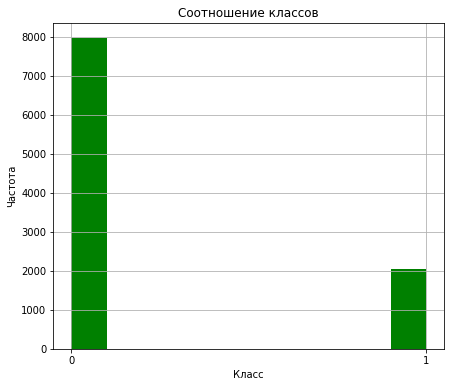

In [17]:
import matplotlib.pyplot as plt

y.plot(
    x=y,
    kind='hist',
    color='green',
    grid=True,
    title='Соотношение классов',
    figsize=[7, 6]
)

plt.xlabel('Класс')
plt.ylabel('Частота')
plt.xticks([0, 1])
plt.show()

Вероятно, для некоторых моделей понадобится использование большего количество объектов класса "1", чтобы они лучше обучились. Ввиду этого, посмотрим нам изменение метрики f1_score при использовании методов как upsampling, так downsampling.

**Дерево решений**

In [18]:
model_1 = DecisionTreeClassifier(random_state=12345, max_depth=6, class_weight='balanced')
model_1.fit(X_train, y_train)

predicted_valid = model_1.predict(X_valid)
print("f1_score:", f1_score(y_valid, predicted_valid))

f1_score: 0.579172610556348


Посмотрим на влиения **upsampling** и **downsampling** на значение метрики f1_score.

In [21]:
def upsample(X, y, repeat):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    
    print(y)
    
    X_upsampled = pd.concat([X_zeros] + [X_ones] * repeat)
    y_upsampled = pd.concat([y_zeros] + [y_ones] * repeat)
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

def downsample(X, y, fraction):
    X_zeros = X[y == 0]
    X_ones = X[y == 1]
    y_zeros = y[y == 0]
    y_ones = y[y == 1]
    
    X_upsampled = pd.concat([X_zeros.sample(frac=fraction)] + [X_ones])
    y_upsampled = pd.concat([y_zeros.sample(frac=fraction)] + [y_ones])
    
    X_upsampled, y_upsampled = shuffle(X_upsampled, y_upsampled, random_state=12345)
    
    return X_upsampled, y_upsampled

In [22]:
best_f1_score = 0
best_rep_dt = 0

for rep in range(1, 10, 1):
    X_u, y_u = upsample(X_train, y_train, rep)

    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=6)
    model_1.fit(X_u, y_u)

    predicted_valid = model_1.predict(X_valid)
    score = f1_score(y_valid, predicted_valid)
    if score > best_f1_score:
        best_f1_score = score
        best_rep_dt = rep

print(f"best_f1_score: {best_f1_score}, best_repeat: {best_rep_dt}")

3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64
3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64
3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64
3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64
3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64
3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700     0
9947    1
Name: Exited, Length: 7500, dtype: int64
3349    1
7094    0
9204    0
6620    0
4737    0
       ..
2360    0
4499    0
1030    0
700 

In [ ]:
stop
best_f1_score = 0
best_frac_dt = 0

for fraction in range(2, 21):
    X_u, y_u = downsample(X_train, y_train, fraction * 0.05)

    model_1 = DecisionTreeClassifier(random_state=12345, max_depth=6)
    model_1.fit(X_u, y_u)

    predicted_valid = model_1.predict(X_valid)
    score = f1_score(y_valid, predicted_valid)
    if score > best_f1_score:
        best_f1_score = score
        best_frac_dt = fraction * 0.05

print(f"best_f1_score: {best_f1_score}, best_frac: {best_frac_dt}")

С downsampling всегда получается разный результат f1_score, но, на основе эмпирических тестов, значение f1_score почти всегда выше значений при использовании upsampling. Ввиду этого предпочтительней использовать downsampling при обучении модели DesicionTreeClassifier.

**Случайный лес**

In [ ]:
model_2 = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=200, class_weight='balanced')
model_2.fit(X_train, y_train)

predicted_valid = model_2.predict(X_valid)
score_f1 = f1_score(y_valid, predicted_valid)

print(f"f1_score: {score_f1}")

In [ ]:
best_f1_score = 0
best_rep_rf = 0

for rep in range(1, 10, 1):
    X_u, y_u = upsample(X_train, y_train, rep)

    model_2 = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=200)
    model_2.fit(X_u, y_u)

    predicted_valid = model_2.predict(X_valid)
    score = f1_score(y_valid, predicted_valid)
    if score > best_f1_score:
        best_f1_score = score
        best_rep_rf = rep


print(f"best_f1_score: {best_f1_score}, best_repeat: {best_rep_rf}")

In [ ]:
best_f1_score = 0
best_frac_rf = 0

for fraction in range(2, 21):
    X_u, y_u = downsample(X_train, y_train, fraction * 0.05)

    model_2 = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=200)
    model_2.fit(X_u, y_u)

    predicted_valid = model_2.predict(X_valid)
    score = f1_score(y_valid, predicted_valid)
    if score > best_f1_score:
        best_f1_score = score
        best_frac_rf = fraction * 0.05

print(f"best_f1_score: {best_f1_score}, best_frac: {best_frac_rf}")

В целом показатели метрики f1_score при осуществлении upsampling и downsampling для модели RandomForestClassifier одинаково высоки и выше требуемых 0.59. Важно отметить, что существенную разницу играет и значение 'balanced' атрибута 'class_weight, с помощью которого на валидационной выборке значение f1_score достигло 0.642 (при том, что без балансировка классов данный показатель составлял 0.585). Тем не менее, наивысшие показатели приходятся именно на использование **upsampling** и **downsampling**.

**Логистическая регрессия**

In [ ]:
model_3 = LogisticRegression(random_state=12345, solver='liblinear', class_weight='balanced')
model_3.fit(X_train, y_train)

predicted_valid = model_3.predict(X_valid)

print(f1_score(y_valid, predicted_valid))

In [ ]:
best_f1_score = 0
best_rep_lr = 0

for rep in range(1, 10, 1):
    X_u, y_u = upsample(X_train, y_train, rep)

    model_3 = LogisticRegression(random_state=12345)
    model_3.fit(X_u, y_u)

    predicted_valid = model_3.predict(X_valid)
    score = f1_score(y_valid, predicted_valid)
    if score > best_f1_score:
        best_f1_score = score
        best_rep_lr = rep

print(f"best_f1_score: {best_f1_score}, best_rep: {best_rep_lr}")

In [ ]:
best_f1_score = 0
best_frac_lr = 0

for fraction in range(2, 21):
    X_u, y_u = downsample(X_train, y_train, fraction * 0.05)

    model_3 = LogisticRegression(random_state=12345)
    model_3.fit(X_u, y_u)

    predicted_valid = model_3.predict(X_valid)
    score = f1_score(y_valid, predicted_valid)
    if score > best_f1_score:
        best_f1_score = score
        best_frac_lr = fraction * 0.05

print(f"best_f1_score: {best_f1_score}, best_frac: {best_frac_lr}")

Значения метрики f1_score при использовании модели LogisticRegression крайне низки (<= 0.5). И не подходят под условие задачи (f1_score => 0.59). Более того наибольшее значение метрики f1_score получается при использовании значения 'balanced' атрибута 'class_weight', а не upsampling и downsampling, как было в моделях DecisionTreeClassifier и RandomForestClassifier.

**Промежуточный вывод**:

Наивысшие значения метрики f1_score демонстрируют модели DecisionTreeClassifier и RandomForestClassifier. По крайне мере на валидационной выборке их значения превышают необходимые 0.59. LogisticRegression, даже с учетом дисбаланса классов, показывает не столь высокое значение f1_score - около 0.46, что явно ниже порогового значения в 0.59. Вряд ли значение на тестовой выборке будет выше, однако рассмотрим это далее.

Более того, DecisionTreeClassifier наилучшим образом обучается при уменьшении выборки (downsampling). Однако, ввиду того, что значение может варьироваться при повторных итерациях, долю, при которой модель демонстрирует наивысшее значение f1_score метрики сохраним в отдельную переменную и будем использовать в дальнейшем.

При RandomForestClassifier применение upsampling или downsampling действительно незначительно, но повышение значение f1_score, однако разница между двумя методами борьбы с дисбалансом минимальна. При тестировании модели будем использовать upsampling, как первый из вариантов.

<a name="model_testing"></a>
## Тестирование модели

Осуществим тестирование моделей на тестовых выборках. Помимо f1_score рассмотрим также и метрику AUC_ROC с помощью roc_auc_score из библиотеки sklearn.

**Дерево решений**

In [ ]:
X_u, y_u = downsample(X_train, y_train, best_frac_dt)

model_1 = DecisionTreeClassifier(random_state=12345, max_depth=6)
model_1.fit(X_u, y_u)
predicted_test = model_1.predict(X_test)

score_f1 = f1_score(y_test, predicted_test)
score_auc_roc = roc_auc_score(y_test, predicted_test)

print(f"f1_score = {score_f1}, auc_roc = {score_auc_roc}")

**Случайный лес**

In [ ]:
X_u, y_u = upsample(X_train, y_train, best_rep_rf)

model_2 = RandomForestClassifier(random_state=12345, max_depth=10, n_estimators=200)
model_2.fit(X_u, y_u)
predicted_test = model_2.predict(X_test)

score_f1 = f1_score(y_test, predicted_test)
score_auc_roc = roc_auc_score(y_test, predicted_test)

print(f"f1_score = {score_f1}, auc_roc = {score_auc_roc}")

**Логистическая регрессия**

In [ ]:
model_3 = LogisticRegression(random_state=12345, class_weight='balanced')
model_3.fit(X_train, y_train)
predicted_test = model_3.predict(X_test)

score_f1 = f1_score(y_test, predicted_test)
score_auc_roc = roc_auc_score(y_test, predicted_test)

print(f"f1_score = {score_f1}, auc_roc = {score_auc_roc}")

In [ ]:
roc_plot = plot_roc_curve(model_2, X_test, y_test)
plt.show()

**Вывод**

Получилось достичь результат f1_score больше 0.59. Единственная модель, которая на тестовой выборке продемонстрировала данный результат - это RandomForestClassifier со следующими параметрами: максимальная глубина дерева - 10, количество деревьев - 200. В дополнение к этому используется метод увеличения выборки (upsampling) для лучшего обучения модели на тренировочной выборке. Используя упомянутые параметры, модель достигла значения метрики f1_score в 0.627, а auc_roc = 0.77 (к слову чем ближе auc_roc к единице, тем лучше модель). 

**Рекомендации**:
Следовательно, для наиболее точного определения, уйдет клиент или останется, рекомендуется использовать случайны лес (RandomForestClassifier). Поскольку и f1_score выше необходимых 0.59, и auc_roc ближе к единице, чем к 0.5.